# Ejemplos del m'etodo Montecarlo

In [1]:
import random
import collections
import math
from types import SimpleNamespace
from typing import List, Tuple, Dict, Any, Optional
from itertools import product

##Calculo de pares en una cantidad x de manos  

In [2]:
#definicion de una baraja
PALOS = ['Espada', 'Trebol', 'Rombo', 'Corazon']
VALORES = ['As', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jota', 'Reina', 'Rey']


In [3]:
#crea una baraja
def crear_baraja():
    baraja = []
    for palo in PALOS:
        for valor in VALORES:
            baraja.append((palo, valor))
    return baraja

In [4]:
#obtener mano
def obtener_mano(barajas, tamano_mano):
    mano = random.sample(barajas, tamano_mano)
    return mano


In [5]:
#resulatado mano
mano = obtener_mano(crear_baraja(), 5)
print(mano)

[('Trebol', 'Jota'), ('Espada', 'Rey'), ('Rombo', '4'), ('Corazon', 'Reina'), ('Espada', 'As')]


In [7]:
# Definicion de un juego con varias manos y el porcentaje de pares que se puede obtener
def valor_mano(tamano_mano, intentos):
    barajas = crear_baraja()
    manos = []
    for _ in range(intentos):
        mano = obtener_mano(barajas, tamano_mano)
        manos.append(mano)

    pares = 0
    for mano in manos:
        valores = []
        for carta in mano:
            valores.append(carta[1])

        counter = dict(collections.Counter(valores))
        for val in counter.values():
            if val == 2:
                pares += 1
                break


    porcentaje = pares / intentos * 100
    print(f"El porcentaje de manos que tienen un par es: {porcentaje}%")
    return manos


In [8]:
#implementacion
tamano_mano = int(input("Ingrese el tamaño de la mano: "))
intentos = int(input("Ingrese el número de intentos: "))
manos = valor_mano(tamano_mano, intentos)
print(manos)

El porcentaje de manos que tienen un par es: 47.69230769230769%
[[('Trebol', 'Jota'), ('Espada', '8'), ('Trebol', '10'), ('Rombo', 'As'), ('Espada', 'Rey')], [('Rombo', '10'), ('Rombo', 'Jota'), ('Corazon', 'Jota'), ('Rombo', 'Reina'), ('Rombo', '6')], [('Corazon', '9'), ('Espada', 'Jota'), ('Trebol', '4'), ('Trebol', 'Rey'), ('Trebol', '9')], [('Trebol', 'Jota'), ('Espada', 'Reina'), ('Trebol', '6'), ('Rombo', 'Jota'), ('Trebol', '4')], [('Rombo', '2'), ('Espada', 'Jota'), ('Espada', 'As'), ('Corazon', '4'), ('Rombo', '5')], [('Rombo', 'As'), ('Espada', '4'), ('Corazon', 'Jota'), ('Trebol', '7'), ('Corazon', '10')], [('Rombo', '6'), ('Trebol', '3'), ('Trebol', '6'), ('Corazon', 'As'), ('Espada', '9')], [('Trebol', '5'), ('Trebol', '10'), ('Corazon', '7'), ('Corazon', '6'), ('Corazon', 'Rey')], [('Corazon', '3'), ('Rombo', '10'), ('Rombo', '9'), ('Corazon', '4'), ('Corazon', 'Reina')], [('Rombo', 'Rey'), ('Trebol', 'Jota'), ('Corazon', 'Rey'), ('Espada', '8'), ('Corazon', '6')], [('Rom

## CalculoPi

In [14]:
#Se intenta calcular pi mediante una funcion que a partir de un numero de agujas las pone al azar en un rectangulo de [-1, 1] y
#cuenta cuantas quedan dentro de un circulo
def aventar_agujas(numero_agujas):
  adentro_circulo = 0
  for _ in range(numero_agujas):
    x = random.random()*random.choice([-1, 1])
    y = random.random()*random.choice([-1, 1])
    distancia_desde_centro = math.sqrt(x**2 + y**2)
    if distancia_desde_centro <= 1:
      adentro_circulo += 1
  return (4 * adentro_circulo) / numero_agujas


In [10]:
#calculo de
def esimacion(numero_agujas, numero_intentos):
  estimaciones = []
  for _ in range(numero_intentos):
    estimacion_pi = aventar_agujas(numero_agujas)
    estimaciones.append(estimacion_pi)
  media_estimaciones = sum(estimaciones) / len(estimaciones)
  sigma = math.sqrt(sum([(estimacion - media_estimaciones)**2 for estimacion in estimaciones]) / len(estimaciones))
  print(f"Estimacion = {round(media_estimaciones, 5)}, sigma = {round(sigma, 5)}, agujas = {numero_agujas}")

  return (media_estimaciones, sigma)


In [11]:

def estimar_pi(precision, numero_intentos):
  numero_agujas = 1000
  sigma = precision

  while sigma >= precision / 1.96:
    media, sigma = esimacion(numero_agujas, numero_intentos)
    numero_agujas *= 2
  return media


In [12]:
estimar_pi(0.01, 1000)

Estimacion = 3.13887, sigma = 0.04993, agujas = 1000
Estimacion = 3.14319, sigma = 0.0364, agujas = 2000
Estimacion = 3.14248, sigma = 0.02563, agujas = 4000
Estimacion = 3.14232, sigma = 0.01937, agujas = 8000
Estimacion = 3.14175, sigma = 0.01278, agujas = 16000
Estimacion = 3.1414, sigma = 0.0092, agujas = 32000
Estimacion = 3.14163, sigma = 0.00627, agujas = 64000
Estimacion = 3.14161, sigma = 0.00462, agujas = 128000


3.14161065625

In [13]:
def crear_baraja():
    baraja = []
    for palo in PALOS:
        for valor in VALORES:
            baraja.append((palo, valor))
    return baraja

## Pca

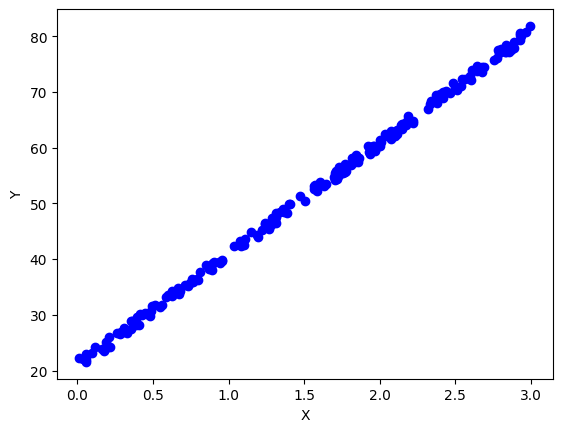

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la semilla para reproducir el experimento
np.random.seed(0)

# Generamos números aleatorios
X = 3 * np.random.rand(200, 1)
y = 20 + 20 * X + 2 * np.random.rand(200, 1)

# Formateamos las matrices
X = X.reshape((200, 1))
y = y.reshape((200, 1))

# Concatenamos los vectores
XY = np.hstack((X, y))

# Visualizamos la dispersión de los puntos
plt.scatter(XY[:, 0], XY[:, 1], marker='o', color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

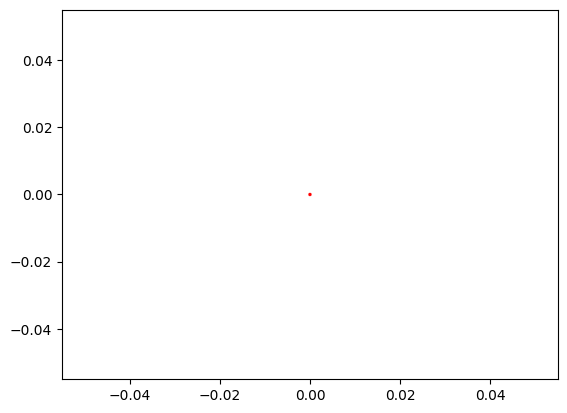

In [19]:
# Centramos los datos
X_centered = X - np.mean(X, axis=0)
Y_centered = y - np.mean(y, axis=0)

# Recalculamos el producto interno
cov_matrix = np.dot(X_centered.T, X_centered)

# Calculamos los autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Graficamos los autovectores
vector_colors = ['r', 'b']
plt.quiver(*np.mean(X_centered, axis=0), *eigenvectors[:,0], scale=eigenvalues[0], color=vector_colors[0])
plt.quiver(*np.mean(y, axis=0), *eigenvectors[:,1], scale=eigenvalues[1], color=vector_colors[1])
plt.show()